In [4]:
import pandas as pd

In [2]:
en_zu_train = pd.read_csv('en-zu.training.csv')
zu_en_train = pd.read_csv('zu-en.training.csv')

en_zu_eval = pd.read_csv('en-zu.eval.csv')
zu_en_eval = pd.read_csv('zu-en.eval.csv')

Since translating from English to Zulu, Use en-zu data?

In [3]:
en_zu_train.head()

,en,zu,source
0,His solo albums in the 60s were some of the mo...,Ama-albhamu akhe e-solo eminyaka yawo-60 angam...,News Crawl 2019
1,From which it follows that if you want to save...,Ukusuka lapho kuzobe sekulandela ukuthi uma uf...,News Crawl 2019
2,Thirty years after St. John Paul II begged Moz...,Ngemuva kweminyaka engamashumi amathathu u-St....,News Crawl 2019
3,Wynford yw sylfaenydd Stafell Fyw yng Nghaerdy...,Wynford yw sylfaenydd Stafell Fyw yng Nghaerdy...,News Crawl 2019
4,Unai Emery's side have won just two of their l...,Iqembu lika-Unai Emery lisanqobe imidlalo emib...,News Crawl 2019


In [4]:
zu_en_train.head()

,zu,en,source
0,"Lomkhakha kufanele uthuthukiswe,� lawa amazwi ...","This sector needs to be developed, � These are...",Newspaper
1,Yonke imibuzo: Ucingo: 031- 311 3154 (Shaks Ra...,All questions: Phone: 031- 311 3154 (Shaks Ram...,Newspaper
2,Axhumanisa umphakathi noMkhandlu ngoba abika k...,They connect the community with the Council be...,Newspaper
3,Umsebenzi kaSolwazi uveze ukubaluleka nokuba i...,The Professor's work has highlighted the impor...,Newspaper
4,Sibusiso Sithole IMenenja yeDolobha IsImEmo sE...,"Sibusiso Sithole, City Manager - Invitation To...",Newspaper


In [5]:
en_zu_eval.head()

,en,zu,zu.1,Source
0,Peter Van Sant: And it means what?,Peter Van Sant: Bese kusho ukuthini?,U-Peter Van Sant: Pho kusho ukuthini lokho?,News Crawl 2019
1,"The cost to society will be substantial, the r...","Izindleko zomphakathi zizoba zinkulu, ngokusho...","Lo mbiko uthi, izindleko ziyoba phezulu kakhul...",News Crawl 2019
2,It is now up to them to make the most of it.,Sekulele kubo ukuthi bayisebenzise ngendlela e...,Manje kukubo ukwenza okungcono ngalokhu.,News Crawl 2019
3,"""The CPS is carefully considering all the avai...","""I-CPS icubungulisisa lonke ulwazi olukhona, o...","""I-CPS icabangela ngokucophelela lonke ulwazi ...",News Crawl 2019
4,TV audiences were left outraged after a teenag...,Izibukeli zaku-TV zishiywe zimangele emuva kok...,Ababukeli be-TV basale beqhuma ngentukuthelo n...,News Crawl 2019


In [6]:
zu_en_eval.head()

,zu,en_1,en_2,source
0,Ikomidi elihlelela imidlalo ye-2013 Orange Afr...,The 2013 Orange Africa Cup of Nations games (k...,The 2013 Orange Africa Cup of Nations (known a...,Newspaper
1,Futhi ipolitiki akuwona umdlalo wabantu abanga...,And politics is not a game of immature people.,And politics is not a game for immature people.,Novel
2,Ikhasi lethu lakwa e-Careers likubeka ngokucac...,Our e-Careers page makes it clear that if you ...,Our e-Careers page makes it clear that if you ...,Newspaper
3,Uma ngibabuza bathi indlu yami inkulu ngakho k...,When I ask them they say my house is big so I ...,When I ask them they say my house is big so I ...,Newspaper
4,Kulonyaka i Earth Hour ifaka ne I Will If You ...,This year Earth Hour also includes I Will If Y...,This year Earth Hour also includes I Will If Y...,Newspaper


In [8]:
En_Corpus = en_zu_train['en'].tolist()

In [9]:
Zu_Corpus = en_zu_train['zu'].tolist()

In [2]:
from tensorflow.keras import Model
from tensorflow.keras.models import load_model,save_model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding, Activation, dot, concatenate, Bidirectional, Attention
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_datasets as tfds
from tensorflow.keras.layers import TimeDistributed, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.backend import expand_dims, sum
from tensorflow.keras.utils import to_categorical
import numpy as np
import nltk
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split

In [4]:
BATCH_SIZE = 16 # 32
EPOCHS = 25 # 25
LSTM_NODES = 128 #128
NUM_SENTENCES = 4000 # 9000
MAX_NUM_WORDS = 5000 # 10000
EMBEDDING_SIZE = 50 # 100

In [12]:
en_zu_train['zu']

0       Ama-albhamu akhe e-solo eminyaka yawo-60 angam...
1       Ukusuka lapho kuzobe sekulandela ukuthi uma uf...
2       Ngemuva kweminyaka engamashumi amathathu u-St....
3       Wynford yw sylfaenydd Stafell Fyw yng Nghaerdy...
4       Iqembu lika-Unai Emery lisanqobe imidlalo emib...
                              ...                        
4734    Isithombe sibonisa ingane encane encelayo nges...
4735    Sola abakhiqizi, abaguqula njalo babeke endawe...
4736                        (U-Javier Garcia/i-BPI/i-REX)
4737    "Ngimhlonipha kakhulu u- Laura, Wenza umsebenz...
4738    Kodwa nanoma bekunezimo zokuvalwa ezibuxakalal...
Name: zu, Length: 4739, dtype: object

In [13]:
en_zu_train['en'].to_csv('my_en_train.txt', sep='\t', index=False, header = False)
en_zu_train['zu'].to_csv('my_zu_train.txt', sep='\t', index=False, header = False)
en_zu_train[['en','zu']].to_csv('my_enzu_train.txt', sep='\t', index=False, header = False)

In [14]:
en_zu_eval['en'].to_csv('my_en_eval.txt', sep='\t', index=False, header = False)
en_zu_eval['zu'].to_csv('my_zu_eval.txt', sep='\t', index=False, header = False)
en_zu_eval['zu.1'].to_csv('my_zu1_eval.txt', sep='\t', index=False, header = False)
en_zu_eval[['en','zu']].to_csv('my_enzu_eval.txt', sep='\t', index=False, header = False)
en_zu_eval[['en','zu.1']].to_csv('my_enzu1_eval.txt', sep='\t', index=False, header = False)

In [15]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

En_Corpus = open('my_en_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in En_Corpus.readlines():
    #print(line)
    if cnt < NUM_SENTENCES:
        input_sentences.append(line.strip('\n'))
    cnt = cnt+1
En_Corpus.close()

Zu_Corpus = open('my_zu_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in Zu_Corpus.readlines():
    if cnt < NUM_SENTENCES:
        output_sentences.append(line.strip('\n') + ' <EOS>')
        output_sentences_inputs.append('<SOS> '+line.strip('\n') )
    cnt = cnt +1
Zu_Corpus.close()

In [16]:
print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))

num samples input: 4000
num samples output: 4000


In [17]:
input_tokenizer = Tokenizer(filters='')
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)
num_words_input = len(word2idx_inputs) + 1

Total unique words in the input: 22100
Length of longest sentence in input: 86


In [18]:
output_tokenizer = Tokenizer(filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 37001
Length of longest sentence in the output: 77


In [19]:
input_text = input_sentences
target_text_input = output_sentences_inputs
target_text_output = output_sentences

input_integer_seq = input_tokenizer.texts_to_sequences(input_text)
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
         
output_input_integer_seq = output_tokenizer.texts_to_sequences(target_text_input)
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
          
output_integer_seq = output_tokenizer.texts_to_sequences(target_text_output)
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
          
decoder_targets_one_hot = np.zeros((len(input_sentences),max_out_len,num_words_output),dtype=np.uint8) # 'float32'

#print('decoder_targets_one_hot ',decoder_targets_one_hot.shape)


for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [20]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
encoder_embedding = Embedding(num_words_input, LSTM_NODES)

x = encoder_embedding(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_sequences = True, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, decoder_states_h, decoder_states_c = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)
decoder_states = [decoder_states_h,decoder_states_c]

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)

opt = RMSprop(learning_rate=0.001)
model.compile(
    #optimizer='rmsprop',
    optimizer = opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 77)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 86, 128)      2828928     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 77, 128)      4736256     input_2[0][0]                    
______________________________________________________________________________________________

In [22]:
callback = EarlyStopping(monitor='val_loss', patience=3)

r = model.fit([encoder_input_sequences, decoder_input_sequences],decoder_targets_one_hot,
              epochs=50, #50
              validation_split=0.1,
              callbacks=[callback])

Epoch 1/100
113/113 [==============================] - 168s 1s/step - loss: 3.4397 - accuracy: 0.7561 - val_loss: 2.2538 - val_accuracy: 0.7807
Epoch 2/100
113/113 [==============================] - 157s 1s/step - loss: 2.2828 - accuracy: 0.7736 - val_loss: 2.2691 - val_accuracy: 0.7860
Epoch 3/100
113/113 [==============================] - 162s 1s/step - loss: 2.2321 - accuracy: 0.7742 - val_loss: 2.2710 - val_accuracy: 0.7864
Epoch 4/100
113/113 [==============================] - 159s 1s/step - loss: 2.1901 - accuracy: 0.7744 - val_loss: 2.3028 - val_accuracy: 0.7863


In [23]:
# Saving Seq2Seq Model (Without Attention) for Eng to Zulu Translation
model.save('Seq2Seq.h5')

### Next Step

In [24]:
# creating Joint Corpus of train using my_en_train and my_zu_train txts

Eng_train_corpus = open("my_en_train.txt","r", encoding='utf-8')
Eng_train_corpus = Eng_train_corpus.read().splitlines()
print('English Train Corpus length is ',len(Eng_train_corpus))

zu_train_corpus = open("my_zu_train.txt","r", encoding='utf-8')
zu_train_corpus = zu_train_corpus.read().splitlines()
print('Zulu Train Corpus length is ',len(zu_train_corpus))

# Creating Joint Corpus of Eval using my_en_eval and my_zu_eval txts
Eng_eval_corpus = open("my_en_eval.txt","r", encoding='utf-8')
Eng_eval_corpus = Eng_eval_corpus.read().splitlines()
print('English Eval Corpus length is ',len(Eng_eval_corpus))

zu_eval_corpus = open("my_zu_eval.txt","r", encoding='utf-8')
zu_eval_corpus = zu_eval_corpus.read().splitlines()
print('Zulu Eval Corpus length is ',len(zu_eval_corpus))

English Train Corpus length is  4746
Zulu Train Corpus length is  5003
English Eval Corpus length is  998
Zulu Eval Corpus length is  1000


In [25]:
# Trimming to make corpuses same length Zulu = Eng, 
zu_train_corpus = zu_train_corpus[0:4746]
zu_eval_corpus = zu_eval_corpus[0:998]

In [26]:
# Joint Corpus for train
joint_Corpus_file = open('joint_train_Corpus.txt','w',encoding='utf-8')
for i in range(len(Eng_train_corpus)):
    joint_Corpus_file.write(Eng_train_corpus[i] + '|' +  zu_train_corpus[i] + '\n')
joint_Corpus_file.close()

# Joint Corpus for Eval
joint_Corpus_file = open('joint_eval_Corpus.txt','w',encoding='utf-8')
for i in range(len(Eng_eval_corpus)):
    joint_Corpus_file.write(Eng_eval_corpus[i] + '|' +  zu_eval_corpus[i] + '\n')
joint_Corpus_file.close()

In [27]:
# Loading the Joint train and eval datasets.
eng_zu_Corpus = open("joint_train_Corpus.txt","r", encoding='utf-8') # Train data
eng_zu_Corpus = eng_zu_Corpus.read().splitlines()
df = pd.DataFrame(eng_zu_Corpus)

eng_zu_Corpus2 = open("joint_eval_Corpus.txt","r", encoding='utf-8') # Eval Data (zu not zu1)
eng_zu_Corpus2 = eng_zu_Corpus2.read().splitlines()
df2 = pd.DataFrame(eng_zu_Corpus2)
# X_train, X_test = train_test_split(df[0:10000], test_size=0.1, random_state=0)

In [28]:
eng_zu_train = np.array(df)
eng_zu_test = np.array(df2)

### create train file for English and Zulu by splitting the text by "!"
eng_Corpus_train = open("eng_Corpus_train.txt","w", encoding='utf-8')
zu_Corpus_train = open("zu_Corpus_train.txt","w", encoding='utf-8')

for i in range(eng_zu_train.shape[0]):
    eng_Corpus_train.write(eng_zu_train[i][0].split('|')[0] + '\n')
    zu_Corpus_train.write(eng_zu_train[i][0].split('|')[1] + '\n')

eng_Corpus_train.close()
zu_Corpus_train.close() 

### create test file for English and Zulu by splitting the text by "!"

eng_Corpus_test = open("eng_Corpus_test.txt","w", encoding='utf-8')
zu_Corpus_test = open("zu_Corpus_test.txt","w", encoding='utf-8')

for i in range(eng_zu_test.shape[0]):
    eng_Corpus_test.write(eng_zu_test[i][0].split('|')[0] + '\n')
    zu_Corpus_test.write(eng_zu_test[i][0].split('|')[1] + '\n')

eng_Corpus_test.close()
zu_Corpus_test.close()

In [29]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

En_Corpus = open('eng_Corpus_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in En_Corpus.readlines():
    #print(line)
    if cnt < NUM_SENTENCES:
        input_sentences.append(line.strip('\n'))
    cnt = cnt+1
En_Corpus.close()

zu_Corpus = open('zu_Corpus_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in zu_Corpus.readlines():
    if cnt < NUM_SENTENCES:
        output_sentences.append(line.strip('\n') + ' <EOS>')
        output_sentences_inputs.append('<SOS> '+line.strip('\n') )
        
    cnt = cnt +1
zu_Corpus.close()

print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))

num samples input: 4000
num samples output: 4000


In [30]:
input_tokenizer = Tokenizer(filters='')
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)
num_words_input = len(word2idx_inputs) + 1

Total unique words in the input: 22100
Length of longest sentence in input: 86


In [31]:
output_tokenizer = Tokenizer(filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 37001
Length of longest sentence in the output: 77


In [32]:
input_text = input_sentences
target_text_input = output_sentences_inputs
target_text_output = output_sentences

input_integer_seq = input_tokenizer.texts_to_sequences(input_text)
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
         
output_input_integer_seq = output_tokenizer.texts_to_sequences(target_text_input)
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
          
output_integer_seq = output_tokenizer.texts_to_sequences(target_text_output)
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
          
decoder_targets_one_hot = np.zeros((len(input_sentences),max_out_len,num_words_output),dtype=np.uint8) # 'float32'

#print('decoder_targets_one_hot ',decoder_targets_one_hot.shape)


for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [33]:
model = load_model('Seq2Seq.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 77)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 86, 128)      2828928     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 77, 128)      4736256     input_2[0][0]                    
______________________________________________________________________________________________

In [34]:
#For Inference Purpose
encoder_inputs_placeholder = Input(shape=(max_input_len,))#model.get_layer('input_1')
encoder_embedding = model.get_layer('embedding')
encoder_lstm = model.get_layer('lstm')

x = encoder_embedding(encoder_inputs_placeholder)
encoder_outputs, h, c = encoder_lstm(x)
encoder_states = [h, c]

#Define Encoder Model
encoder_model = Model(encoder_inputs_placeholder, encoder_states)  #without attention

In [35]:
decoder_state_input_h = Input(shape=(LSTM_NODES,),name='decoder_h_input')
decoder_state_input_c = Input(shape=(LSTM_NODES,),name='decoder_c_input')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_embedding = model.get_layer('embedding_1')

decoder_inputs_single = Input(shape=(1,),name='decoder_single_input')
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)
decoder_lstm = model.get_layer('lstm_1')

decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)
decoder_states = [h, c]
print('decoder_outputs shape:',decoder_outputs.shape)

decoder_dense = model.get_layer('dense')

decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

decoder_outputs shape: (None, 1, 128)


In [36]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [37]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [38]:
# prediction on test data

input_sentences_test = []
output_sentences_test = []

En_Corpus_test = open('eng_Corpus_test.txt','r',encoding = 'utf-8')
cnt = 0 
for line in En_Corpus_test.readlines():
    #print(line)
    if cnt < NUM_SENTENCES:
        input_sentences_test.append(line.strip('\n'))
    cnt = cnt+1
En_Corpus_test.close()

zu_Corpus_test = open('zu_Corpus_test.txt','r',encoding = 'utf-8')
cnt = 0 
for line in zu_Corpus_test.readlines():
    if cnt < NUM_SENTENCES:
        output_sentences_test.append(line.strip('\n') + ' <EOS>')
    cnt = cnt +1
zu_Corpus_test.close()

In [39]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
smooth = SmoothingFunction().method2 # math domain error with method4, trying method 2 or 1 or 0 (No Smoothing)

def calculate_bleu(text1,text2):
    hypothesis = text1.split()
    reference = text2.split()

    reference_list = [reference] # list of references for 1 sentence.
    bleu_score = nltk.translate.bleu_score.sentence_bleu(reference_list, hypothesis,smoothing_function = smooth)
    return bleu_score

In [40]:
test_pred_result = open('test_prediction_without_attention','w',encoding = 'utf-8')
test_sent_bleu = {}
for s in range(len(input_sentences_test)):
    input_integer_seq = input_tokenizer.texts_to_sequences([input_sentences_test[s]])
    encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
    translation = translate_sentence(encoder_input_sequences)
    sent_bleu = calculate_bleu(output_sentences_test[s].strip('<EOS>'),translation)
    test_sent_bleu[s] = sent_bleu
    text = str(s) + ' ' + input_sentences_test[s] + '|' + output_sentences_test[s].strip('<EOS>') + 'Predicted: ' + translation + ' Bleu Score: ' + str(sent_bleu)
    test_pred_result.write(text + '\n')
test_pred_result.close()

test_cospus_score = np.sum(list(test_sent_bleu.values()))/len(input_sentences_test)
print('Test Corpus Bleu Score without attention:',test_cospus_score)

Test Corpus Bleu Score without attention: 0.001520824298441906


In [41]:
test_sent_bleu_sorted_index = sorted(test_sent_bleu, key=test_sent_bleu.get, reverse=True)

test_best = []
for i in test_sent_bleu_sorted_index[0:20]:
    test_best.append(i)

for s in test_best:
    input_integer_seq = input_tokenizer.texts_to_sequences([input_sentences_test[s]])
    encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
    translation = translate_sentence(encoder_input_sequences)
    sent_bleu = calculate_bleu(output_sentences_test[s].strip('<EOS>'),translation)
    test_sent_bleu[s] = sent_bleu
    text = str(s) + ' ' + input_sentences_test[s] + '|' + output_sentences_test[s].strip('<EOS>') + 'Predicted: ' + translation + ' Bleu Score: ' + str(sent_bleu)
    print(text)

224 This looks fab and really sets off your festive decorations - but given that you have to pop each balloon to access each day's chocolate, it's probably one to avoid with very young children. Unless your little ones will be able to resist popping all the balloons at once. Ours weren't, and they're old enough to know better.|Kubukeka kukuhle lokhu futhi kuqalisa imihlobiso yangesikhathi sokuzijabulisa - kodwa njengoba kuzodingeka uqhumise ibhaluni ukuthola ushokoledi wosuku nosuku, mhlawumbe kungadingeka ukubalekele lokho uma unezingane ezincane. Ngaphandle kwalapho izingane zakho zizokwazi ukumela ukuqhuma kwawo wonke amabhaluni ngesikhathi esisodwa. Ezethu zazingeke zikwazi, futhi sezindala ngokwanele ukuthi zazi kangcono. Predicted: kodwa ukuthi uthe ukuthi uthe ukuthi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi

897 They explain how the air we breathe oxygenates our lungs.|ndaweni yokudlela esikoleni ngesikhathi sokudla, lapho abangani bami babehleba begigitheka ngabafana, ngangifunda ikhasi namakhasi umama wami ayechaza kuwo ukuthi wazibamba kanjani, ngomzuzu wokugcina, ekuziphoseni eweni noma ekuziphoseni olwandle ukuze aminze. Wabhala ukuthi wayengithanda kangakanani futhi esikhumbula kakhulu kangakanani sonke. Kuze kuba manje, akakaze abuye. Predicted: kodwa ukuthi ukuthi ukuthi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi Bleu Score: 0.0143765168439508
966 It isn't clear if the water colour is due to th

348 Unlike cryptocurrencies such as bitcoin, nifties are cryptographic tokens that represent a unique asset or good on the blockchain, are one of a kind, and are not interchangeable. Blockchains can enable gamers to buy and trade interoperable digital collectibles such as skins, dances, and in-game items, helping further fuel a $50 billion-plus annual market1 for virtual goods.|Hhayi njengama-cryptocurrencies anjenge-bitcoin, ama-nifties angamathokheni anezithombe ezi-cryptographic ezimele impahla ehlukile kwi-blockchain, okungavamile, futhi okungasebenziseki ngokushintshanisa. Ama-blockchain angenza abadlali bathenge futhi bahwebe ngezinto ezisebenza ngobuchwepheshe bedijithali ezoqoqekayo njengama-skin, abadansi, nezinto zemidlalo, okusiza ukuqhubeka nokufaka isamba esingaphezu kwezigidigidi ezingu-$50 ezimakethe maqondana nempahla yezobuchwepheshe ephakathi kumakhompyutha. Predicted: kodwa ukuthi ukuthi ukuthi uthe futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi futhi fu

*** 

## With Attention

In [51]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

En_Corpus = open('eng_Corpus_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in En_Corpus.readlines():
    #print(line)
    if cnt < NUM_SENTENCES:
        input_sentences.append(line.strip('\n'))
    cnt = cnt+1
En_Corpus.close()

zu_Corpus = open('zu_Corpus_train.txt','r',encoding = 'utf-8')
cnt = 0 
for line in zu_Corpus.readlines():
    if cnt < NUM_SENTENCES:
        output_sentences.append(line.strip('\n') + ' <EOS>')
        output_sentences_inputs.append('<SOS> '+line.strip('\n') )
        
    cnt = cnt +1
zu_Corpus.close()

print("num samples input:", len(input_sentences))
print("num samples output:", len(output_sentences))

num samples input: 4000
num samples output: 4000


In [52]:
input_tokenizer = Tokenizer(filters='')
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)
num_words_input = len(word2idx_inputs) + 1

Total unique words in the input: 22100
Length of longest sentence in input: 86


In [53]:
output_tokenizer = Tokenizer(filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 37001
Length of longest sentence in the output: 77


In [54]:
input_text = input_sentences
target_text_input = output_sentences_inputs
target_text_output = output_sentences

input_integer_seq = input_tokenizer.texts_to_sequences(input_text)
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
         
output_input_integer_seq = output_tokenizer.texts_to_sequences(target_text_input)
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
          
output_integer_seq = output_tokenizer.texts_to_sequences(target_text_output)
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
          
decoder_targets_one_hot = np.zeros((len(input_sentences),max_out_len,num_words_output),dtype=np.uint8) # 'float32'

#print('decoder_targets_one_hot ',decoder_targets_one_hot.shape)


for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [55]:
encoder_inputs_placeholder = Input(shape=(max_input_len,))
encoder_embedding = Embedding(num_words_input, LSTM_NODES)

x = encoder_embedding(encoder_inputs_placeholder)
encoder_biLSTM = Bidirectional(LSTM(LSTM_NODES, return_sequences = True, return_state=True),merge_mode= 'concat')

encoder_outputs, h_forward, c_forward,h_backward,c_backward = encoder_biLSTM(x)

encoder_h = concatenate([h_forward,h_backward],axis = 1)
encoder_c = concatenate([c_forward,c_backward],axis = 1)
print(encoder_h.shape)
encoder_states = [encoder_h, encoder_c]
print('encoder_outputs shape:',encoder_outputs.shape)

(None, 256)
encoder_outputs shape: (None, 86, 256)


In [56]:
decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES*2, return_sequences=True, return_state=True)

decoder_outputs, decoder_states_h, decoder_states_c = decoder_lstm(decoder_inputs_x,initial_state=encoder_states)

decoder_states = [decoder_states_h,decoder_states_c]
print('decoder outputs shape:',decoder_outputs.shape)
print('decoder_states_h shape:',decoder_states_h.shape)

decoder outputs shape: (None, 77, 256)
decoder_states_h shape: (None, 256)


In [57]:
#Bahdanau attention
from tensorflow.keras import activations
w1 = Dense(10)
w2 = Dense(10)
v =  Dense(1)

#decoder_h_timeaxis = expand_dims(decoder_states_h,1)
encoder_h_timeaxis = expand_dims(encoder_h,1)

score = v(activations.tanh(w1(encoder_h_timeaxis) + (w2(encoder_outputs)) ))
attention_softmax = activations.softmax(score,axis=1)
context = attention_softmax * encoder_outputs
context_vector = sum(context,axis=1)
context_vector_timeaxis = expand_dims(context_vector,1)
decoder_combined_context = context_vector_timeaxis + decoder_outputs

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)


model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)

opt = RMSprop(learning_rate=0.001)
model.compile(
    optimizer = opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 86, 128)      2828928     input_6[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 86, 256), (N 263168      embedding_4[0][0]                
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 256)          0           bidirectional_1[0][1]            
                                                                 bidirectional_1[0][3]      

In [59]:
callback = EarlyStopping(monitor='val_loss', patience=3)

r = model.fit([encoder_input_sequences, decoder_input_sequences],decoder_targets_one_hot,
              epochs=25,
              validation_split=0.1,
              callbacks=[callback])

Epoch 1/25
113/113 [==============================] - 225s 2s/step - loss: 2.8165 - accuracy: 0.7580 - val_loss: 2.2645 - val_accuracy: 0.7859
Epoch 2/25
113/113 [==============================] - 219s 2s/step - loss: 2.2754 - accuracy: 0.7740 - val_loss: 2.2603 - val_accuracy: 0.7861
Epoch 3/25
113/113 [==============================] - 214s 2s/step - loss: 2.2114 - accuracy: 0.7744 - val_loss: 2.2755 - val_accuracy: 0.7865
Epoch 4/25
113/113 [==============================] - 207s 2s/step - loss: 2.1681 - accuracy: 0.7746 - val_loss: 2.2667 - val_accuracy: 0.7862
Epoch 5/25
113/113 [==============================] - 248s 2s/step - loss: 2.1323 - accuracy: 0.7748 - val_loss: 2.2862 - val_accuracy: 0.7861


In [60]:
train_loss = r.history['loss']
val_loss   = r.history['val_loss']
xc         = range(20)

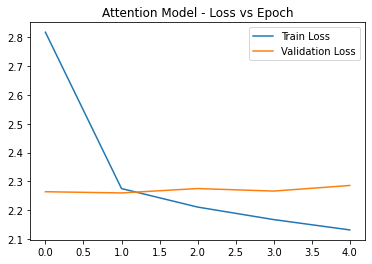

In [61]:
import matplotlib.pyplot as plt
plt.title('Attention Model - Loss vs Epoch')
plt.plot(train_loss,label= 'Train Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc="upper right")

In [62]:
model.save('Seq2Seq_attention.h5')

***